# Deconvolution Benchmark: Python SimpleITK

---
## Setup

In [2]:
import numpy as np
from skimage.io import imread, imsave
# from skimage.data import cells3d
from skimage import img_as_float32 as img_as_float
from skimage.filters import gaussian
from scipy.ndimage import convolve
from napari_simpleitk_image_processing import richardson_lucy_deconvolution
import matplotlib.pyplot as plt
import imageio.v2 as iio

/Users/yi/Library/Python/3.9/lib/python/site-packages/napari_tools_menu/__init__.py:10: UserWarning: Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.
  warnings.warn("Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.")
/Users/yi/Library/Python/3.9/lib/python/site-packages/napari_tools_menu/__init__.py:221: UserWarning: Error in monkey patching napari. Please let @haesleinleinhuepf know at
https://github.com/haesleinhuepf/napari-tools-menu/issues
  warnings.warn("Error in monkey patching napari. Please let @haesleinleinhuepf know at\nhttps://github.com/haesleinhuepf/napari-tools-menu/issues")
/Users/yi/Library/Python/3.9/lib/python/site-packages/napari_skimage_regionprops/_table.py:7: UserWarning: No Qt bindings could be found
  warnings.warn(str(e))


---
## Test image

In [3]:
psfP = img_as_float(iio.imread("psf.jpg"))
imgP_n = img_as_float(iio.imread("blurrednoisy_img.jpg"))

In [4]:
number_of_iterations = 30
imgP_dec = richardson_lucy_deconvolution(imgP_n, psfP, number_of_iterations)


In [5]:
%timeit -n 1 -r 10 richardson_lucy_deconvolution(imgP_n, psfP, number_of_iterations)

6.64 s ± 36.3 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


---
## Cell

In [6]:
image = img_as_float(iio.imread("cells3d.tif"))[30,1]
# imshow(image)
image.shape

(256, 256)

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

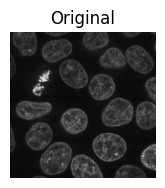

In [7]:
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')  # Ocultar los ejes para una mejor visualización

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

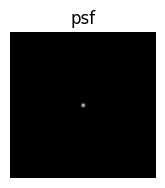

In [10]:
perfect_psf = np.zeros(image.shape)
cx, cy = int(image.shape[0]/2), int(image.shape[1]/2)
perfect_psf[cx, cy] = 1
psf = gaussian(perfect_psf, sigma=2)

plt.subplot(1, 3, 1)
plt.imshow(psf, cmap='gray')
plt.title('psf')
plt.axis('off')  # Ocultar los ejes para una mejor visualización

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

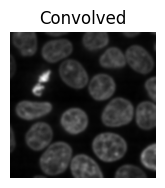

In [11]:
convolved = convolve(image, psf)

plt.subplot(1, 3, 1)
plt.imshow(convolved, cmap='gray')
plt.title('Convolved')
plt.axis('off') 

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

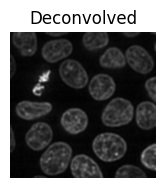

In [12]:
number_of_iterations = 30
deconvolved = richardson_lucy_deconvolution(convolved, psf, number_of_iterations)

plt.subplot(1, 3, 1)
plt.imshow(deconvolved, cmap='gray')
plt.title('Deconvolved')
plt.axis('off') 

In [20]:
# imsave("cells3d_convolved.tif",convolved)
# imsave("cells3d_psf.tif",psf)

In [13]:
%timeit -n 1 -r 100  richardson_lucy_deconvolution(convolved, psf, number_of_iterations)

1.46 s ± 6.57 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)


In [14]:
%timeit -n 10 -r 10  richardson_lucy_deconvolution(convolved, psf, number_of_iterations)

1.46 s ± 1.73 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
